In [1]:
from utils import *
from MySolution import MyClassifier
import matplotlib.pyplot as plt
import cvxpy as cp
from sklearn.metrics import accuracy_score


Synthetic data shape:  (1000, 2) (1000,)


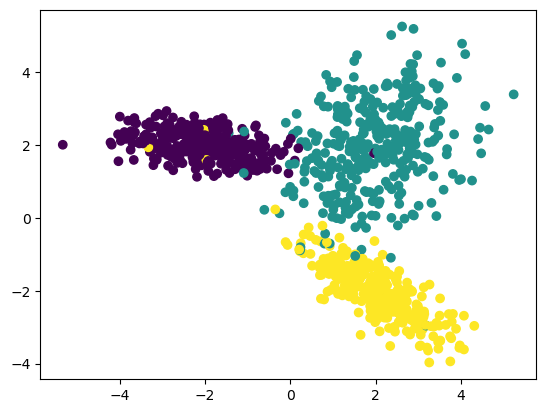

MNIST data shape:  (1000, 784) (1000,)


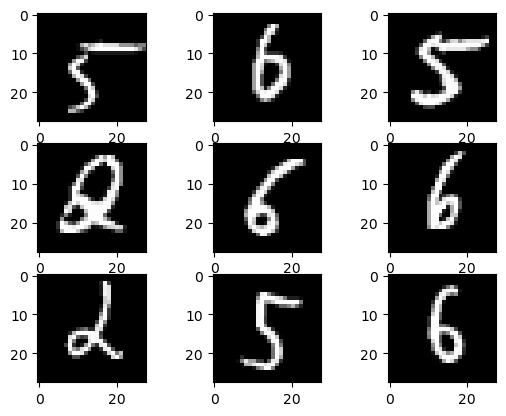

In [2]:
# Get datasets
syn_data = prepare_synthetic_data()
print("Synthetic data shape: ", syn_data['trainX'].shape, syn_data['trainY'].shape)

# Plot synthetic data
plt.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=syn_data['trainY'])
plt.show()

mnist_data = prepare_mnist_data()
print("MNIST data shape: ", mnist_data['trainX'].shape, mnist_data['trainY'].shape)

# Plot MNIST data
for i in range(9):	
    plt.subplot(330 + 1 + i)
    plt.imshow(mnist_data['trainX'][i].reshape(28, 28), cmap='gray')
plt.show()




In [3]:
# import numpy as np
# import cvxpy as cp
# from sklearn.metrics import accuracy_score

# class MyClassifier:  
#     def __init__(self, K):
#         self.K = K  # Number of classes
#         self.W = None
#         self.b = None
#         self.label_map = None

#     def _one_hot_encode(self, labels):
#         unique_labels = np.unique(labels)
#         self.label_map = {label: idx for idx, label in enumerate(unique_labels)}
#         one_hot = np.zeros((len(labels), self.K))
#         for idx, label in enumerate(labels):
#             one_hot[idx, self.label_map[label]] = 1
#         return one_hot

#     def train(self, trainX, trainY):
#         N = trainX.shape[1]  # Number of features
#         M = trainX.shape[0]  # Number of training samples

#         y_train = self._one_hot_encode(trainY)  # One-hot encode trainY

#         W = cp.Variable((self.K, N))
#         b = cp.Variable(self.K)
#         slack = cp.Variable((M, self.K))

#         # Objective: Minimize the sum of slack variables (change to linear SVM)
#         objective = cp.Minimize(cp.sum(slack))

#         # Constraints for hinge loss
#         constraints = []
#         for i in range(M):
#             for k in range(self.K):
#                 y_binary = 1 if y_train[i, k] == 1 else -1
#                 constraints.append(y_binary * (W[k] @ trainX[i] + b[k]) >= 1 - slack[i, k])
#                 constraints.append(slack[i, k] >= 0)  # Slack variables must be non-negative

#         prob = cp.Problem(objective, constraints)
#         prob.solve(solver=cp.ECOS)

#         self.W = W.value
#         self.b = b.value

#     def predict(self, testX):
#         raw_pred = testX @ self.W.T + self.b
#         pred_idx = np.argmax(raw_pred, axis=1)
#         predY = np.array([list(self.label_map.keys())[list(self.label_map.values()).index(i)] for i in pred_idx])
#         return predY

#     def evaluate(self, testX, testY):
#         predY = self.predict(testX)
#         accuracy = accuracy_score(testY, predY)
#         return accuracy
#     def predict_raw_scores(self, X):
#         return X @ self.W.T + self.b


In [4]:
# Initialize classifier
num_classes_synthetic = len(np.unique(syn_data['trainY'])) # independent of number of classes in the dataset required by the project
#print(num_classes_synthetic)
num_classes_mnist = len(np.unique(mnist_data['trainY']))  # The number of classes in this project is 3 (only label 2,5,6)
classifier_synthetic = MyClassifier(num_classes_synthetic)
classifier_mnist = MyClassifier(num_classes_mnist)

In [5]:
# Train classifiers
classifier_synthetic.train(syn_data['trainX'], syn_data['trainY'])
classifier_mnist.train(mnist_data['trainX'], mnist_data['trainY'])



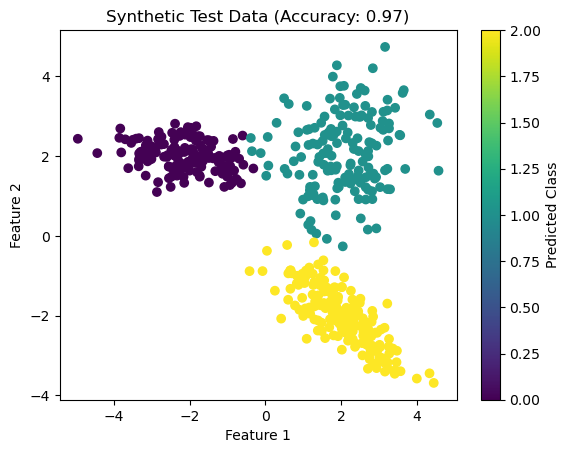

MNIST Test Data Accuracy: 0.84


In [6]:
import matplotlib.pyplot as plt

# Assuming classifier_synthetic and classifier_mnist are instances of MyClassifier
# Assuming syn_data and mnist_data are dictionaries containing 'trainX', 'trainY', 'testX', 'testY'

# Train classifiers
classifier_synthetic.train(syn_data['trainX'], syn_data['trainY'])
classifier_mnist.train(mnist_data['trainX'], mnist_data['trainY'])

# Evaluate classifiers
synthetic_test_accuracy = classifier_synthetic.evaluate(syn_data['testX'], syn_data['testY'])
mnist_test_accuracy = classifier_mnist.evaluate(mnist_data['testX'], mnist_data['testY'])

#Plotting for Synthetic Data
#Ensure that syn_data and classifier_synthetic are not None
if syn_data is not None and classifier_synthetic is not None:
    predicted_labels_synthetic = classifier_synthetic.predict(syn_data['testX'])
    plt.scatter(syn_data['testX'][:, 0], syn_data['testX'][:, 1], c=predicted_labels_synthetic)
    plt.title(f"Synthetic Test Data (Accuracy: {synthetic_test_accuracy:.2f})")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Predicted Class')
    plt.show()

#Plotting for MNIST Data
#TA has verified that MNIST data cannot be plotted in the same way as synthetic data because it's not 2D.

print(f"MNIST Test Data Accuracy: {mnist_test_accuracy:.2f}")



In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(classifier, X, Y):
    # Set min and max values and give some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01  # step size in the mesh

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    Z = classifier.predict_raw_scores(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolor='k', cmap=plt.cm.Spectral)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()


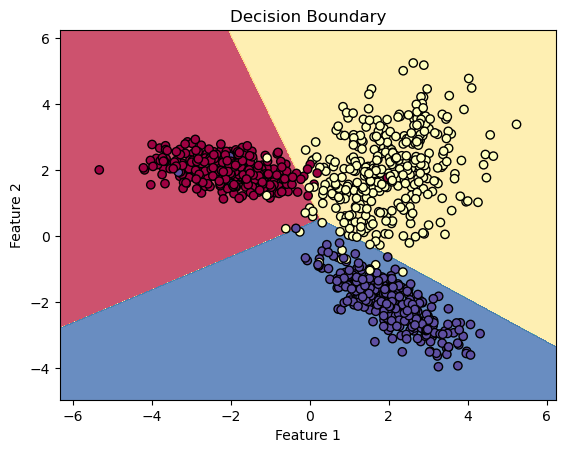

In [8]:
# Assuming classifier_synthetic is an instance of MyClassifier and is trained
# Assuming syn_data contains the synthetic dataset
plot_decision_boundary(classifier_synthetic, syn_data['trainX'], syn_data['trainY'])
